# Data cleansing :: Data Problems

### Data quality problems 
>- 데이터의 최대/최소가 다름  ->  scale에 따른 y값에 영향 미침
>- Ordinary 또는 Nominal한 값들의 표현은 어떻게 하나?
>- 잘못 기입된 값들에 대한 처리
>- 값이 없을 경우에는?
>- 극단적으로 큰 값 또는 작은 값들을 그대로 나둬야 하는가?

### Data preprocessing issues
>- 데이터가 빠진 경우 (결측치의 처리)
>- 라벨링 된 데이터 (category) 데이터의 처리
>- 데이터의 scale의 차이가 매우 크게 날 경우

***

# Data cleansing :: Missing Values

### 데이터가 없을 때 할 수 있는 전략
>- 데이터가 없으면 sample을 drop
>- 데이터가 없는 **최소 개수**를 정해서 **sample을 drop**
>- 데이터가 거의 없는 feature는 **feature 자체를 drop**
>- 최빈값, 평균값으로 비어있는 데이터를 채우기



***Data drop***

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Eaxmple from - https://chrisalbon.com/python/pandas_missing_data.html
raw_data = {'first_name': ['Jason', np.nan, 'Tina', 'Jake', 'Amy'],
        'last_name': ['Miller', np.nan, 'Ali', 'Milner', 'Cooze'],
        'age': [42, np.nan, 36, 24, 73],
        'sex': ['m', np.nan, 'f', 'm', 'f'],
        'preTestScore': [4, np.nan, np.nan, 2, 3],
        'postTestScore': [25, np.nan, np.nan, 62, 70]}
df = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'age', 'sex', 'preTestScore', 'postTestScore'])
df

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [3]:
df.isnull().sum() / len(df)  #몇퍼센트가 비어있는가?

first_name       0.2
last_name        0.2
age              0.2
sex              0.2
preTestScore     0.4
postTestScore    0.4
dtype: float64

In [4]:
df_no_missing = df.dropna()
df_no_missing  #dropna -> 데이터들이 사라짐

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


***

In [5]:
df

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [6]:
df_cleaned = df.dropna(how='all') 
df_cleaned  #모든 데이터가 비어 있으면 drop

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [7]:
df['location'] = np.nan  #nan을 생성 column
df

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


In [8]:
df.dropna(axis=1, how='all') #column을 기준으로 삭제

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [9]:
df.dropna(axis=1, thresh = 3)  #column기준, 데이터가 최소 4개 이상 없을 때 drop

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [10]:
df.dropna(axis=0, thresh=1)  #row기준, 데이터가 최소 2개 이상 없을 때 drop

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,NaN
2,Tina,Ali,36.0,f,NaN,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


In [11]:
df.dropna(thresh=5)

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


***
### 데이터 값 채우기
>- 평균값, 중위값, 최빈값을 활용 (https://goo.gl/i8iuL9)
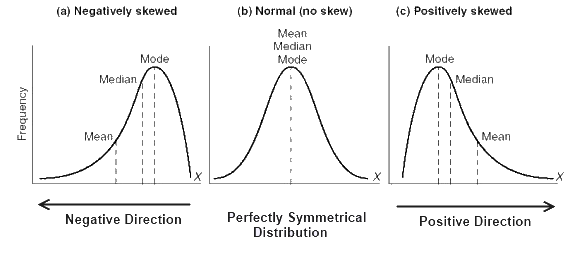

In [13]:
# 평균값 : 해당 column의 값의 평균을 내서 채우기
df["preTestScore"].mean()

3.0

In [15]:
# 중위값 : 값을 일렬로 나열했을 때 중간에 위치한 값
df["postTestScore"].median()

62.0

In [17]:
# 최빈값 : 가장 많이 나오는 값
df["postTestScore"].mode()

0    25.0
1    62.0
2    70.0
dtype: float64

***Data Fill***

In [18]:
df.fillna(0)  #데이터가 없는 곳은 0으로 집어넣어라

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,0.0
1,0,0,0.0,0,0.0,0.0,0.0
2,Tina,Ali,36.0,f,0.0,0.0,0.0
3,Jake,Milner,24.0,m,2.0,62.0,0.0
4,Amy,Cooze,73.0,f,3.0,70.0,0.0


In [20]:
df["preTestScore"].fillna(df["preTestScore"].mean(), inplace=True)
df  #preTestScore의 평균값을 집어넣어라

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,NaN
1,NaN,NaN,NaN,NaN,3.0,NaN,NaN
2,Tina,Ali,36.0,f,3.0,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


In [23]:
df.groupby("sex")["postTestScore"].transform("mean")

0    43.5
1     NaN
2    70.0
3    43.5
4    70.0
Name: postTestScore, dtype: float64

In [24]:
df["postTestScore"].fillna(
    df.groupby("sex")["postTestScore"].transform("mean"), inplace=True)
df  #성별로 나눠서 평균 값을 집어넣어라

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,NaN
1,NaN,NaN,NaN,NaN,3.0,NaN,NaN
2,Tina,Ali,36.0,f,3.0,70.0,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN
